# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 4: *ImageClassification*
Classify an image by using deep learning
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Tensor flow
import tensorflow as tf
from tensorflow.keras import models, layers

# For loading data
import pickle

# Module functions
from ImageUtilities import imageReadL, plotImageL, plotImageF
from PlotUtilities import plot2Curves

### Parameters:
    dataSetFileName = Name of the data file

In [2]:
dataSetFileName = "ShapesClassificationData.pickle"

### Load dataset

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter4/Input/")
with open(pathToDir+dataSetFileName, 'rb') as f:
     data = pickle.load(f)

trainImages, trainLabels, testImages, testLabels = data 

print(trainImages.shape, trainLabels.shape, testImages.shape, testLabels.shape)
print(trainLabels.shape[0])

trainLabels= tf.keras.utils.to_categorical(trainLabels)
testLabels= tf.keras.utils.to_categorical(testLabels)

# Number of classes
print(trainLabels.shape[1])

(1200, 32, 32) (1200,) (120, 32, 32) (120,)
1200
3


### Alternative mnist dataset

### Show an image

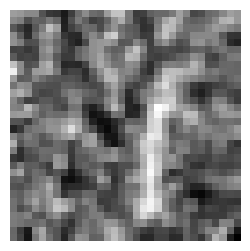

In [4]:
plotImageF(trainImages[4], figureSize = 3)

### Build the model

In [5]:
imageSize = trainImages.shape[1]

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(imageSize, imageSize, 1)))
model.add(layers.Conv2D(3,(3,3),activation='relu')) 
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(2,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(trainLabels.shape[1], activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 2)           │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 2)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           9,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             243 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,653 (119.74 KB)

 Trainable params: 30,653 (119.74 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model¶

In [6]:
trainImages2=trainImages.reshape(trainImages.shape[0],trainImages.shape[1],trainImages.shape[2],1)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainImages2,trainLabels,epochs=15, batch_size=32, verbose=1)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3905 - loss: 1.0909
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5448 - loss: 0.9826
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7275 - loss: 0.6671
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8191 - loss: 0.4680
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8331 - loss: 0.4307
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8992 - loss: 0.2685 
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9226 - loss: 0.2247
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.1825
Epoch 9/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9322 - loss: 0.1730
Epoch 10/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9488 - loss: 0.1372
Epoch 11/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9671 - loss: 0.1045
Epoch 12/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9795 - l

### Plot training

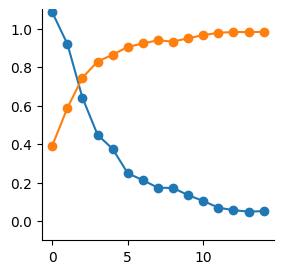

In [7]:
plot2Curves(history.history['loss'], history.history['accuracy'], rangeY = [-.1, 1.1])

### Evaluation

In [8]:
testImages2=testImages.reshape(testImages.shape[0],testImages.shape[1],testImages.shape[2],1)

test_loss, test_acc = model.evaluate(testImages2, testLabels)
print("accuracy:", test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9442 - loss: 0.1164 
accuracy: 0.9333333373069763


### Prediction

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction  : ['0.0', '1.0', '0.0']
Actual label: [0. 1. 0.]


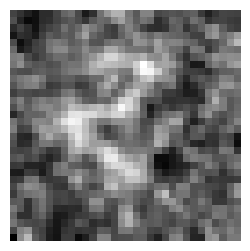

In [9]:
imageToPredict = 14

predictions=model.predict(testImages2)

print("Prediction  : %s" % [ "{:0.1f}".format(x) for x in predictions[imageToPredict] ])
print("Actual label: %s" % (testLabels[imageToPredict]))

plotImageF(testImages[imageToPredict], figureSize = 3)